# Milestone 2 : Laptop Price Prediction

## I. Perkenalan

Nama : Ahmad Nawwaaf

Batch : 002

### I.I Dataset

Laptop merupakan barang elektronik yang cukup sering di beli oleh masyarakat. Laptop memiliki banyak tipe yang ditujukan untuk beberapa hal spesifik seperti laptop untuk Gaming, Creator, Student, dll. Untuk membantu pemilihan laptop, kita dapat melakukannya dengan memprediksi harga laptop.

Pada tugas ini, akan dilakukan prediksi harga laptop yang dimana dataset berasal dari kaggle. Dataset ini berisi spesifikasi laptop dan harga yang beredar di Eropa.

https://www.kaggle.com/datasets/muhammetvarl/laptop-price


## I.II Objective

- Memprediksi harga laptop dengan menggunakan model regresi

## II. Import Libraries

In [1]:
# Define Libraries
import pandas as pd
import numpy as np
from scipy import stats
import pickle
from sklearn import set_config

# For plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# For Regression Problems
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Standarize the Datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, OrdinalEncoder
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

# Error and Display settings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', 150)
import warnings
warnings.filterwarnings('ignore')
import time

## III. Data Loading

Pada bab ini, akan dilakukan loading data dan pembersihan data.

In [2]:
df = pd.read_csv('laptop_price.csv',encoding='latin-1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


Menampilkan informasi dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1302 non-null   int64  
 1   Company           1302 non-null   object 
 2   Product           1302 non-null   object 
 3   TypeName          1302 non-null   object 
 4   Inches            1302 non-null   float64
 5   ScreenResolution  1302 non-null   object 
 6   Cpu               1302 non-null   object 
 7   Ram               1302 non-null   object 
 8   Memory            1302 non-null   object 
 9   Gpu               1302 non-null   object 
 10  OpSys             1302 non-null   object 
 11  Weight            1302 non-null   object 
 12  Price_euros       1302 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.4+ KB


Dataset yang digunakan terdiri dari 1303 baris dan 13 kolom. Terlihat bahwa tidak ada missing values dari dataset. Setiap kolom akan dicek nilainya dan tipe datanya.

Mengecek apakah ada data duplikat atau tidak

In [4]:
df.duplicated().any()

False

Dari hasil diatas kita dapat mengetahui bahwa tidak ada data duplikat pada dataset.

### III.I Data Cleaning

Menampilkan jumlah index (baris data)

In [5]:
df.index.nunique()

1302

Menampilkan jumlah unique value dari kolom `laptop_ID`

In [6]:
df.laptop_ID.nunique()

1302

Kolom `laptop_ID` dan index dari dataset berjumlah sama. Kolom `laptop_ID` pada dataset ini dapat diartikan sebagai index dataset sehingga kolom ini akan di drop.

In [7]:
df_clean = df.drop(columns=['laptop_ID'])

Kolom `Weight`

In [8]:
df_clean[['Weight']].head()

,Weight
0,1.37kg
1,1.34kg
2,1.86kg
3,1.83kg
4,1.37kg


Kolom ini menjelaskan berat laptop dalam satuan `kg`. Untuk itu, akan dihilangkan tulisan `kg` sehingga kolom menjadi numerik.

In [9]:
df_clean['Weight'] = df_clean['Weight'].str.replace('kg', '').astype('float64')


Kolom `Ram`

Merubah nama kolom `Ram` menjadi `RAM`

In [10]:
df_clean.rename(columns={'Ram':'RAM'}, inplace=True)

Menampilkan 5 data pertama dari kolom `RAM`

In [11]:
df_clean['RAM'].head()

0     8GB
1     8GB
2     8GB
3    16GB
4     8GB
Name: RAM, dtype: object

Kolom ini menjelaskan ram yang digunakan laptop dalam satuan `GB`. Untuk itu, akan dihilangkan tulisan `GB` dan kolom akan diubah menjadi numerik.

In [12]:
df_clean['RAM'] = df_clean['RAM'].str.replace('GB', '').astype('int')

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1302 non-null   object 
 1   Product           1302 non-null   object 
 2   TypeName          1302 non-null   object 
 3   Inches            1302 non-null   float64
 4   ScreenResolution  1302 non-null   object 
 5   Cpu               1302 non-null   object 
 6   RAM               1302 non-null   int32  
 7   Memory            1302 non-null   object 
 8   Gpu               1302 non-null   object 
 9   OpSys             1302 non-null   object 
 10  Weight            1302 non-null   float64
 11  Price_euros       1302 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.1+ KB


Terlihat bahwa kolom `Weight` dan `Ram` berhasil diubah tipe datanya.

Kolom `Memory`

In [14]:
df_clean.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

Dari hasil diatas, kita akan melakukan cleaning pada kolom `Memory`. Kolom `Memory` adalah kolom yang menjelaskan besar memory yang digunakanan dalam satuan GB.

Ubah tipe datanya menjadi tipe data string, kemudian menghapus tulisan `.0` dan `GB` serta mengubah tulisan `TB` menjadi `000` (1 TB = 1000 GB).

In [15]:
df_clean['Memory'] = df_clean['Memory'].astype(str).replace('\.0', '', regex=True)
df_clean["Memory"] = df_clean["Memory"].str.replace('GB', '')
df_clean["Memory"] = df_clean["Memory"].str.replace('TB', '000')

Karena ada `Memory` yang berupa gabungan beberapa tipe maka akan di pisahkan menjadi `HDD`, `SSD`, `Hybrid` dan `Flash Storage`

In [16]:
new = df_clean["Memory"].str.split("+", n = 1, expand = True)
new[0] = new[0].str.strip()
new["Layer1HDD"] = new[0].apply(lambda x: 1 if "HDD" in x else 0)
new["Layer1SSD"] = new[0].apply(lambda x: 1 if "SSD" in x else 0)
new["Layer1Hybrid"] = new[0].apply(lambda x: 1 if "Hybrid" in x else 0)
new["Layer1Flash_Storage"] = new[0].apply(lambda x: 1 if "Flash Storage" in x else 0)
new[0] = new[0].str.replace(r'\D', '')

new[1].fillna('0', inplace=True)
new["Layer2HDD"] = new[1].apply(lambda x: 1 if "HDD" in x else 0)
new["Layer2SSD"] = new[1].apply(lambda x: 1 if "SSD" in x else 0)
new["Layer2Hybrid"] = new[1].apply(lambda x: 1 if "Hybrid" in x else 0)
new["Layer2Flash_Storage"] = new[1].apply(lambda x: 1 if "Flash Storage" in x else 0)
new[1] = new[1].str.replace(r'\D', '')

new[0] = new[0].astype(int)
new[1] = new[1].astype(int)

new["HDD"]=(new[0]*new["Layer1HDD"]+new[1]*new["Layer2HDD"])
new["SSD"]=(new[0]*new["Layer1SSD"]+new[1]*new["Layer2SSD"])
new["Hybrid"]=(new[0]*new["Layer1Hybrid"]+new[1]*new["Layer2Hybrid"])
new["Flash_Storage"]=(new[0]*new["Layer1Flash_Storage"]+new[1]*new["Layer2Flash_Storage"])

new.drop(columns=[0, 1, 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

df_clean[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']] = new[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']]
df_clean.drop(columns=['Memory'], inplace=True)

In [17]:
df_clean.head(3)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,0,128
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,No OS,1.86,575.00,0,256,0,0


Kolom `OpSys`

In [18]:
df_clean.OpSys.value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

Kolom `OpSys` menjelaskan operasi sistem yang digunakan oleh laptop, disini saya akan membaginya menjadi `Windows`, `Mac`, `Linux`, `DOS`, `Others`. Others merupakan operasi sistem selain yang sudah disebutkan.

In [19]:
df_clean['OpSys'].replace(['Windows 10','Windows 7','Windows 10 S'], 'Windows', inplace=True)
df_clean['OpSys'].replace(['macOS', 'Mac OS X'], 'Mac', inplace=True)
df_clean['OpSys'].replace('No OS', 'DOS', inplace=True)
df_clean['OpSys'].replace(['Chrome OS', 'Android'], 'Others', inplace=True)

Melihat jenis operasi sistem setelah dilakukan perubahan

In [20]:
df_clean.OpSys.value_counts()

Windows    1125
DOS          66
Linux        62
Others       28
Mac          21
Name: OpSys, dtype: int64

Terlihat bahwa tipe-tipe operasi sistem berhasil diubah.

In [21]:
df_clean.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,RAM,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,128,0,0
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,128


Kolom `Cpu`

Mengganti nama kolom `Cpu` menjadi `CPU`

In [22]:
df_clean.rename(columns={'Cpu':'CPU'}, inplace=True)

In [23]:
df_clean[['CPU']].head()

,CPU
0,Intel Core i5 2.3GHz
1,Intel Core i5 1.8GHz
2,Intel Core i5 7200U 2.5GHz
3,Intel Core i7 2.7GHz
4,Intel Core i5 3.1GHz


Memisahkan frekuensi dari CPU

definisi fungsi untuk mengambil data frequency CPU

In [24]:
def laststr(x):
    last = x.split(' ')[-1]
    return last

Membuat kolom frekuensi cpu

In [25]:
df_clean['CPU_GHz'] = df_clean['CPU'].apply(laststr)
df_clean['CPU_GHz'] = df_clean['CPU_GHz'].str.replace('GHz', '').astype(float)

Memisahkan Model CPU

In [26]:
df_clean['CPU_Model'] = df_clean['CPU'].apply(lambda x:" ".join(x.split()[0:3]))
df_clean.drop(columns=['CPU'], inplace=True)

In [27]:
df_clean.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,RAM,Gpu,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,CPU_GHz,CPU_Model
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,128,0,0,2.3,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,128,1.8,Intel Core i5


Kolom `Gpu`

Mengganti nama kolom `Gpu` menjadi `GPU`

In [28]:
df_clean.rename(columns={'Gpu':'GPU'}, inplace=True)
df_clean[['GPU']].head()

,GPU
0,Intel Iris Plus Graphics 640
1,Intel HD Graphics 6000
2,Intel HD Graphics 620
3,AMD Radeon Pro 455
4,Intel Iris Plus Graphics 650


Kolom `ScreenResolution`

In [29]:
df_clean.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

Dari hasil di atas, terlihat ada laptop yang memiliki layar touchscreen dan tidak. Karena itu, akan dibuat kolom `TouchScreen`

In [30]:
df_clean['TouchScreen'] = df_clean['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [31]:
df_clean['Resolution'] = df_clean['ScreenResolution'].apply(laststr)
new_1 = df_clean['Resolution'].str.split('x', 1,expand=True)
df_clean['Resolution_X'] = new_1[0]
df_clean['Resolution_Y'] = new_1[1]
df_clean['Resolution_X'] = df_clean['Resolution_X'].astype(int)
df_clean['Resolution_Y'] = df_clean['Resolution_Y'].astype(int)
df_clean.head(2)

,Company,Product,TypeName,Inches,ScreenResolution,RAM,GPU,OpSys,Weight,Price_euros,HDD,SSD,Hybrid,Flash_Storage,CPU_GHz,CPU_Model,TouchScreen,Resolution,Resolution_X,Resolution_Y
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,128,0,0,2.3,Intel Core i5,0,2560x1600,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,128,1.8,Intel Core i5,0,1440x900,1440,900


Setelah data resolusi dari layar (`Resolution_X` dan `Resolution_Y`) terekstrak maka kolom `ScreenResolution` dan `Resolution` akan dihapus

In [32]:
df_clean.drop(columns=['ScreenResolution', 'Resolution'], inplace=True)

Merubah beberapa nama kolom

In [33]:
df_clean.rename(columns={'Company':'Laptop_Brand', 'TypeName':'Laptop_Type', 'RAM':'RAM_GB', 'HDD':'HDD_GB', 'SSD':'SSD_GB', 'Hybrid':'Hybrid_GB', 'Flash_Storage':'Flash_Storage_GB', 'Weight':'Weight_Kg'}, inplace=True)

In [34]:
df_clean.head(2)

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,Price_euros,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,128,0,0,2.3,Intel Core i5,0,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,128,1.8,Intel Core i5,0,1440,900


Mengecek data duplikat

In [35]:
df_clean.duplicated().any()

True

Karena terdapat data duplikat maka data tersebut akan dihapus

In [36]:
df_clean.drop_duplicates(inplace=True)

Setelah selesai melakukan data cleaning, maka selanjutnya akan dilakukan Exploratory Data Analysis (EDA). Sebelum melakukan EDA, sebaiknya kita mengetahui makna dari kolom yang digunakan, berikut ini penjelasan dari setiap kolom:

- `Laptop_Brand` : Nama brand dari laptop
- `Product` : Nama produk yang dikeluarkan oleh brand laptop
- `Laptop_Type` : Nama tipe laptop
- `Inches` : Panjang diagonal layar laptop (inch)
- `RAM_GB` : Besar RAM yang digunakan laptop
- `OpSys` : Sistem operasi yang digunakan pada laptop
- `Weight_Kg` : Berat dari laptop (Kg)
- `Price_euros` : Harga Laptop (Euro)
- `HDD_GB` : Tipe penyimpanan Hardisk yang digunakan pada laptop (GB)
- `SSD_GB` : Tipe penyimpanan SSD yang digunakan pada laptop (GB)
- `Hybrid_GB` : Tipe penyimpanan Hybrid yang digunakan pada laptop (GB)
- `Flash_Storage_GB` : Tipe penyimpanan Flash Storage yang digunakan pada laptop (GB)
- `CPU_GHz` : Besar frekuensi CPU yang digunakan pada laptop
- `CPU_Brand` : Nama brand CPU yang digunakan pada laptop
- `CPU_Model` : Nama model dari brand CPU yang digunakan pada laptop
- `GPU_Brand` : Nama brand GPU yang digunakan pada laptop
- `GPU_Model` : Nama model dari brand GPU yang digunakan pada laptop
- `TouchScreen` : Apakah layar laptop yang digunakan touch-screen(layar sentuh) atau tidak? (0=tidak, 1=ya)
- `Resolusi_X` : Resolusi pada layar laptop (sumbu X horizontal) dalam satuan pixel
- `Resolusi_Y` : Resolusi pada layar laptop (sumbu Y vertikal) dalam satuan pixel

## IV. Exploratory Data Analysis (EDA)

### IV.I Brand Laptop

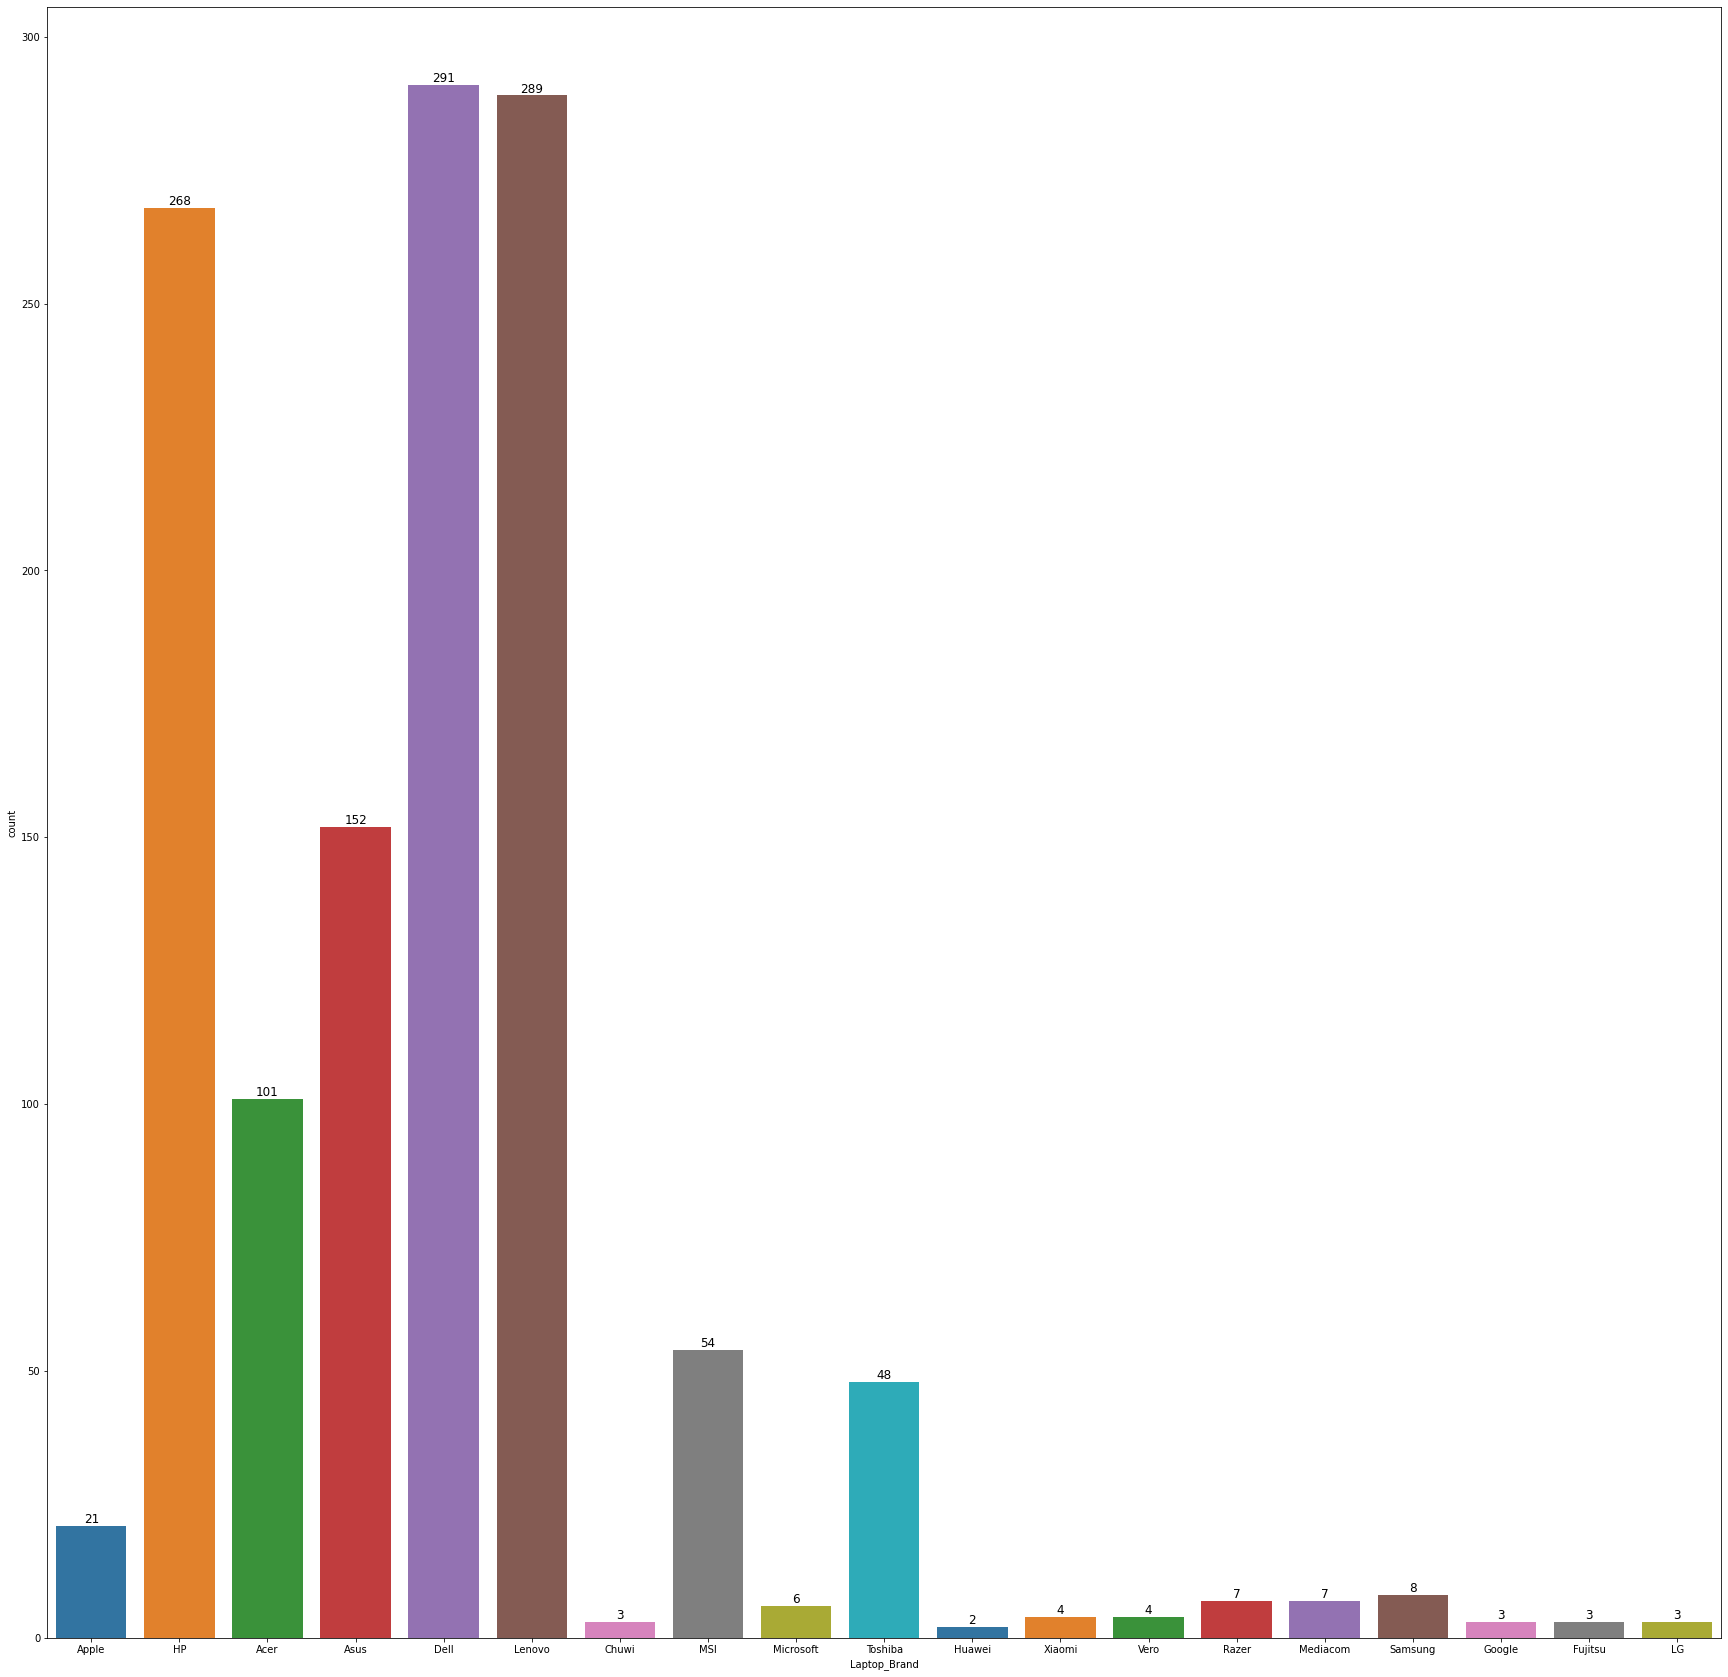

In [37]:
plt.figure(figsize=(30,30))
ax = sns.countplot(data=df_clean, x='Laptop_Brand', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=12)
plt.show()

In [38]:
laptop = ['Dell', 'Lenovo', 'HP', 'Asus', 'Acer']
for i in laptop:
    a = df_clean[df_clean['Laptop_Brand']==i]
    print(i, ':', a['Product'].mode()[0])

Dell : XPS 13
Lenovo : Legion Y520-15IKBN
HP : 250 G6
Asus : Rog Strix
Acer : Aspire 3


Dari grafik diatas, diketahui bahwa laptop yang dijual kebanyakan berasal dari Brand DELL, kemudian LENOVO, HP, ASUS, dan ACER. Dari ke lima brand ini, Laptop yang terbanyak terjual adalah XPS 13 untuk DELL, Legion Y520-15IKBN untuk LENOVO, 250 G6 untuk HP, Rog Strix untuk ASUS, dan Aspire 3 untuk Acer.

### IV.II Harga Laptop Berdasarkan Brand

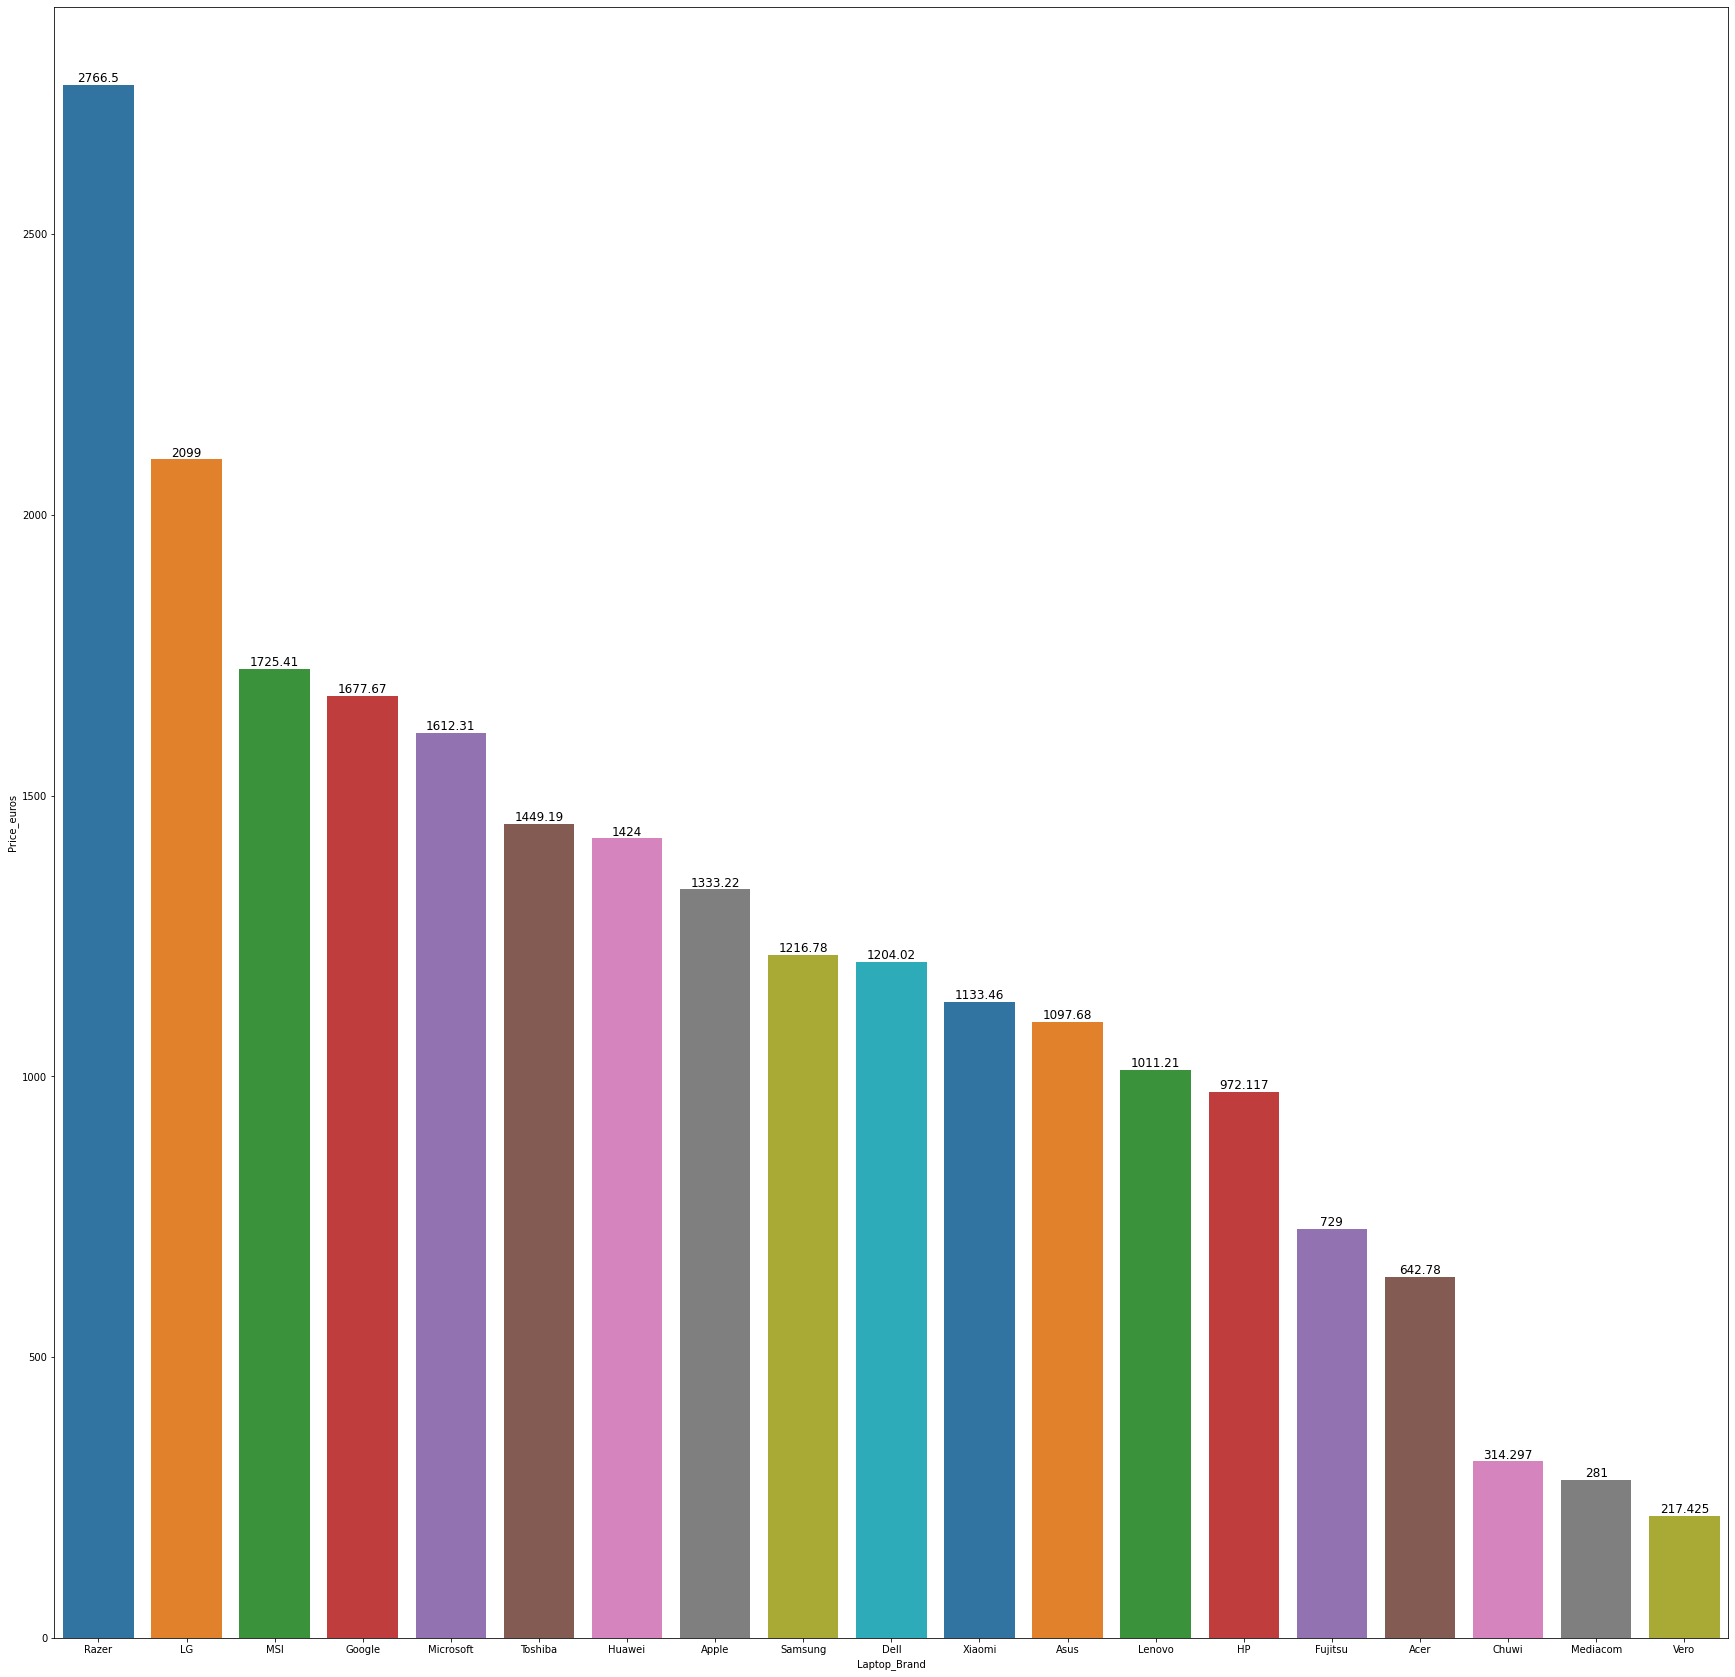

In [39]:
Harga_brand = df_clean.groupby(['Laptop_Brand', 'Product'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
mean_harga = Harga_brand.groupby(['Laptop_Brand'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
plt.figure(figsize=(30,30))
ax = sns.barplot(data=mean_harga, x='Laptop_Brand', y='Price_euros', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=12)
plt.show()

Dari grafik di atas, kita dapat mengetahui harga rata-rata dari setiap brand laptop.

3 Laptop termahal yaitu :
1. `Razer` dengan harga rata-rata 2766,5 Euro
2. `LG` dengan harga rata-rata 2099 Euro
3. `MSI` dengan harga rata-rata 1725,41 Euro

3 Laptop termurah yaitu :
1. `Vero` dengan harga rata-rata 217,43 Euro
2. `Mediacom` dengan harga rata-rata 281 Euro
3. `Chuwi` dengan harga rata-rata 314,29 Euro



### IV.III Harga Laptop Berdasarkan Sistem Operasi

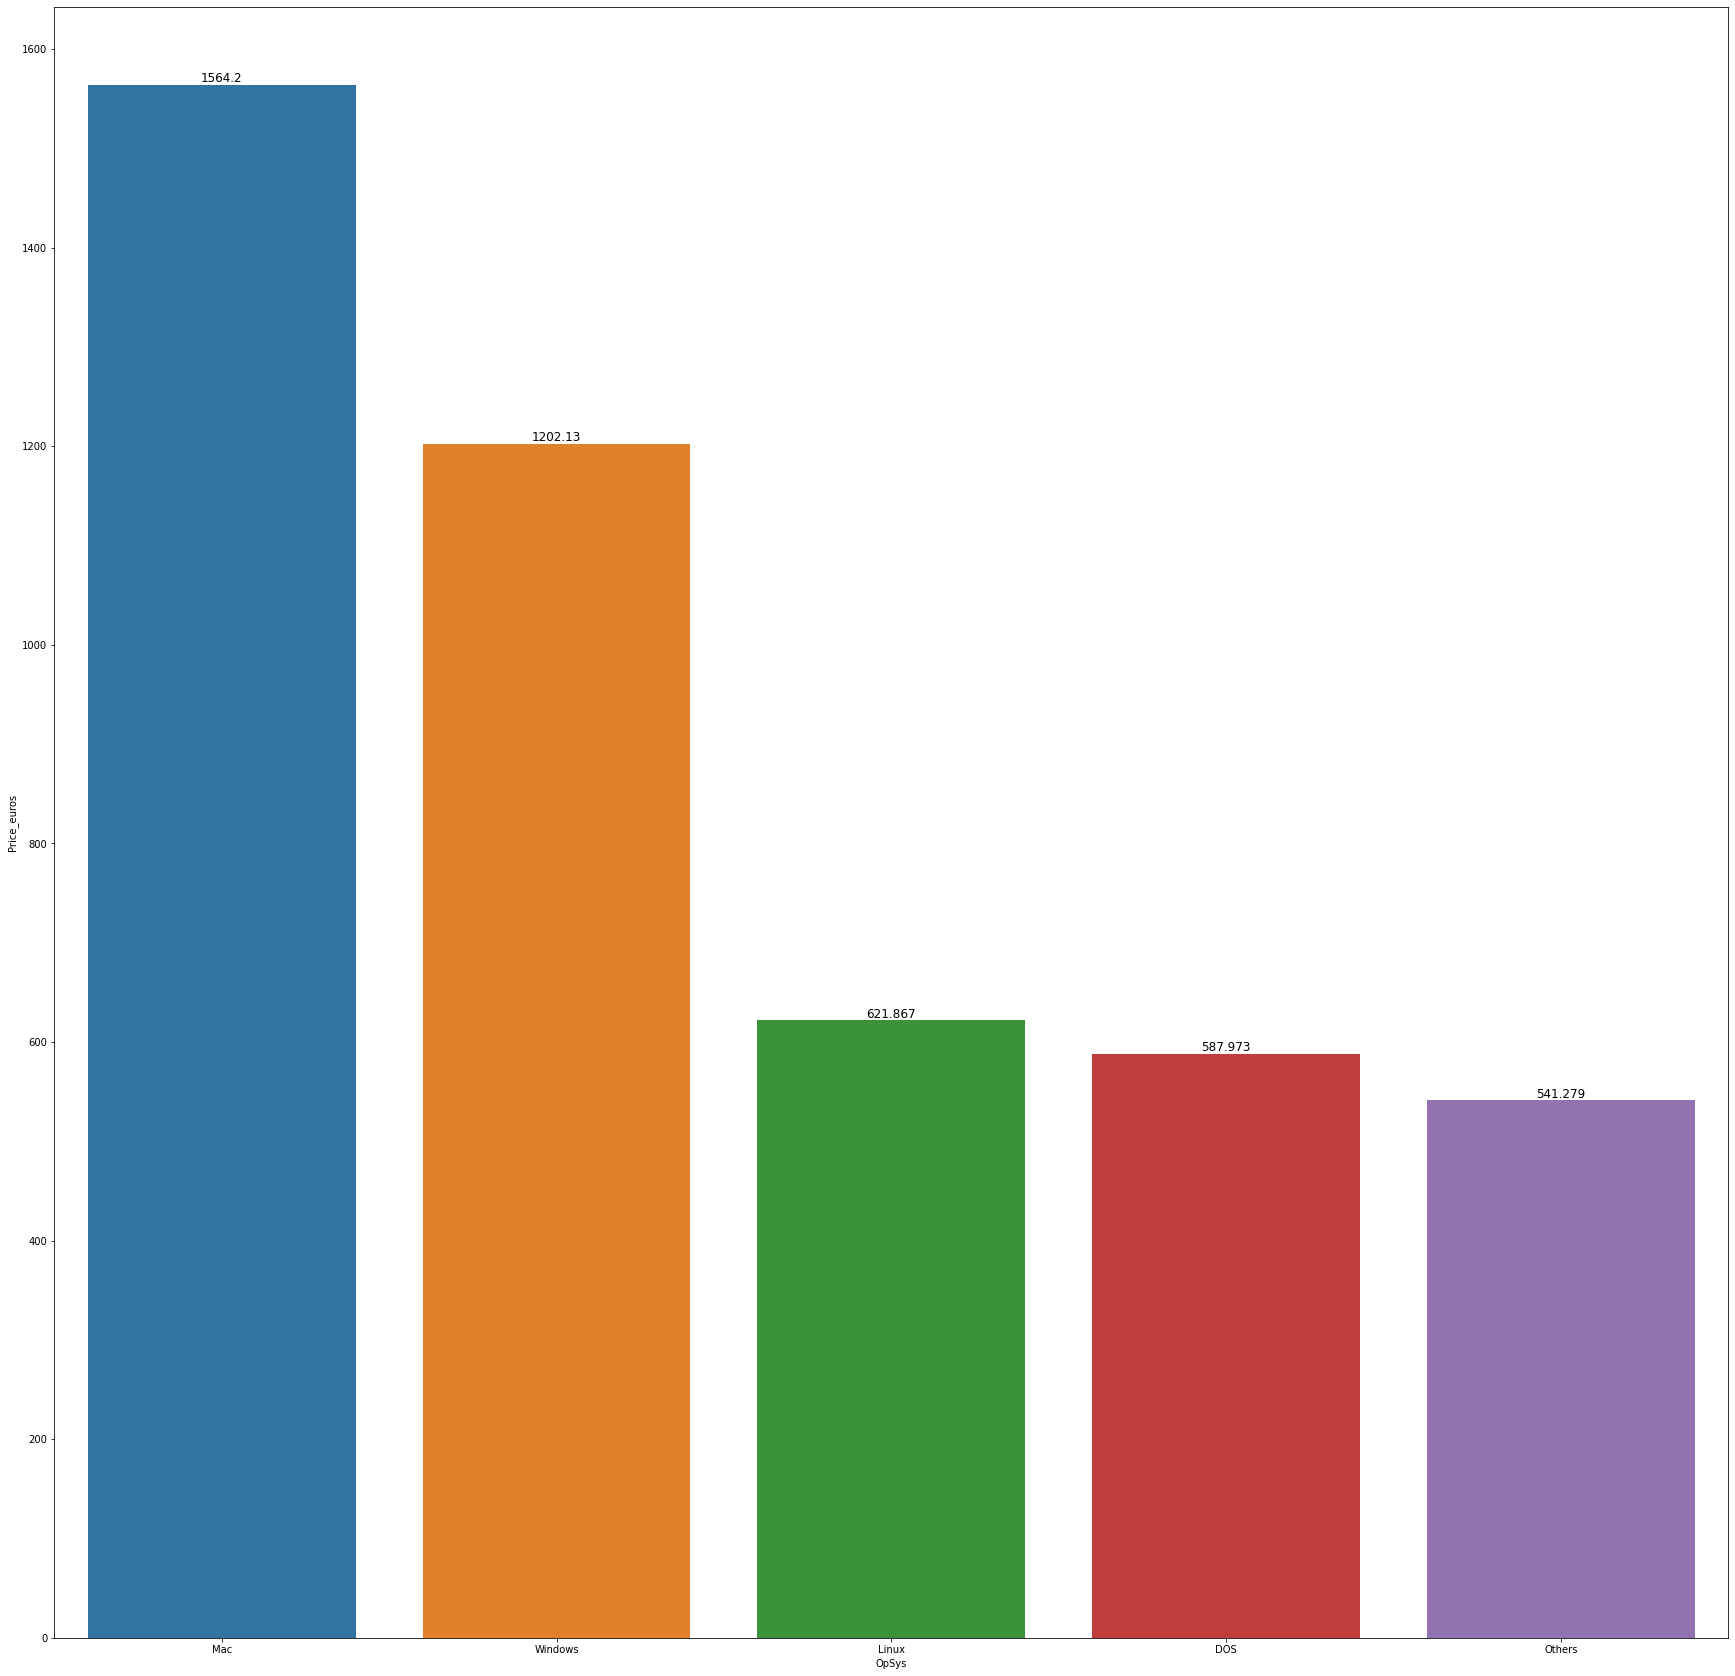

In [40]:
OS_mean = df_clean.groupby(['OpSys'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
plt.figure(figsize=(30,30))
ax = sns.barplot(data=OS_mean, x='OpSys', y='Price_euros', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=12)
plt.show()

Dar grafik diatas, kita dapat mengetahui bahwa Laptop dengan Sistem Operasi Mac memiliki harga rata-rata laptop yang tertinggi dengan 1564,2 Euro, Kemudian disusul oleh Laptop dengan sistem operasi Windows dengan harga rata-rata 1202,12 Euro, lalu laptop dengan sistem operasi Linux dengan harga rata-rata 621,87 Euro, lalu laptop tanpa sistem operasi (DOS) dengan harga rata-rata 587,97 Euro, dan yang terakhir adalah laptop dengan sistem operasi yang lainnya seperti Chrome dan Android dengan harga rata-rata 545,34 Euro.

### IV.IV Harga rata-rata Tipe Laptop

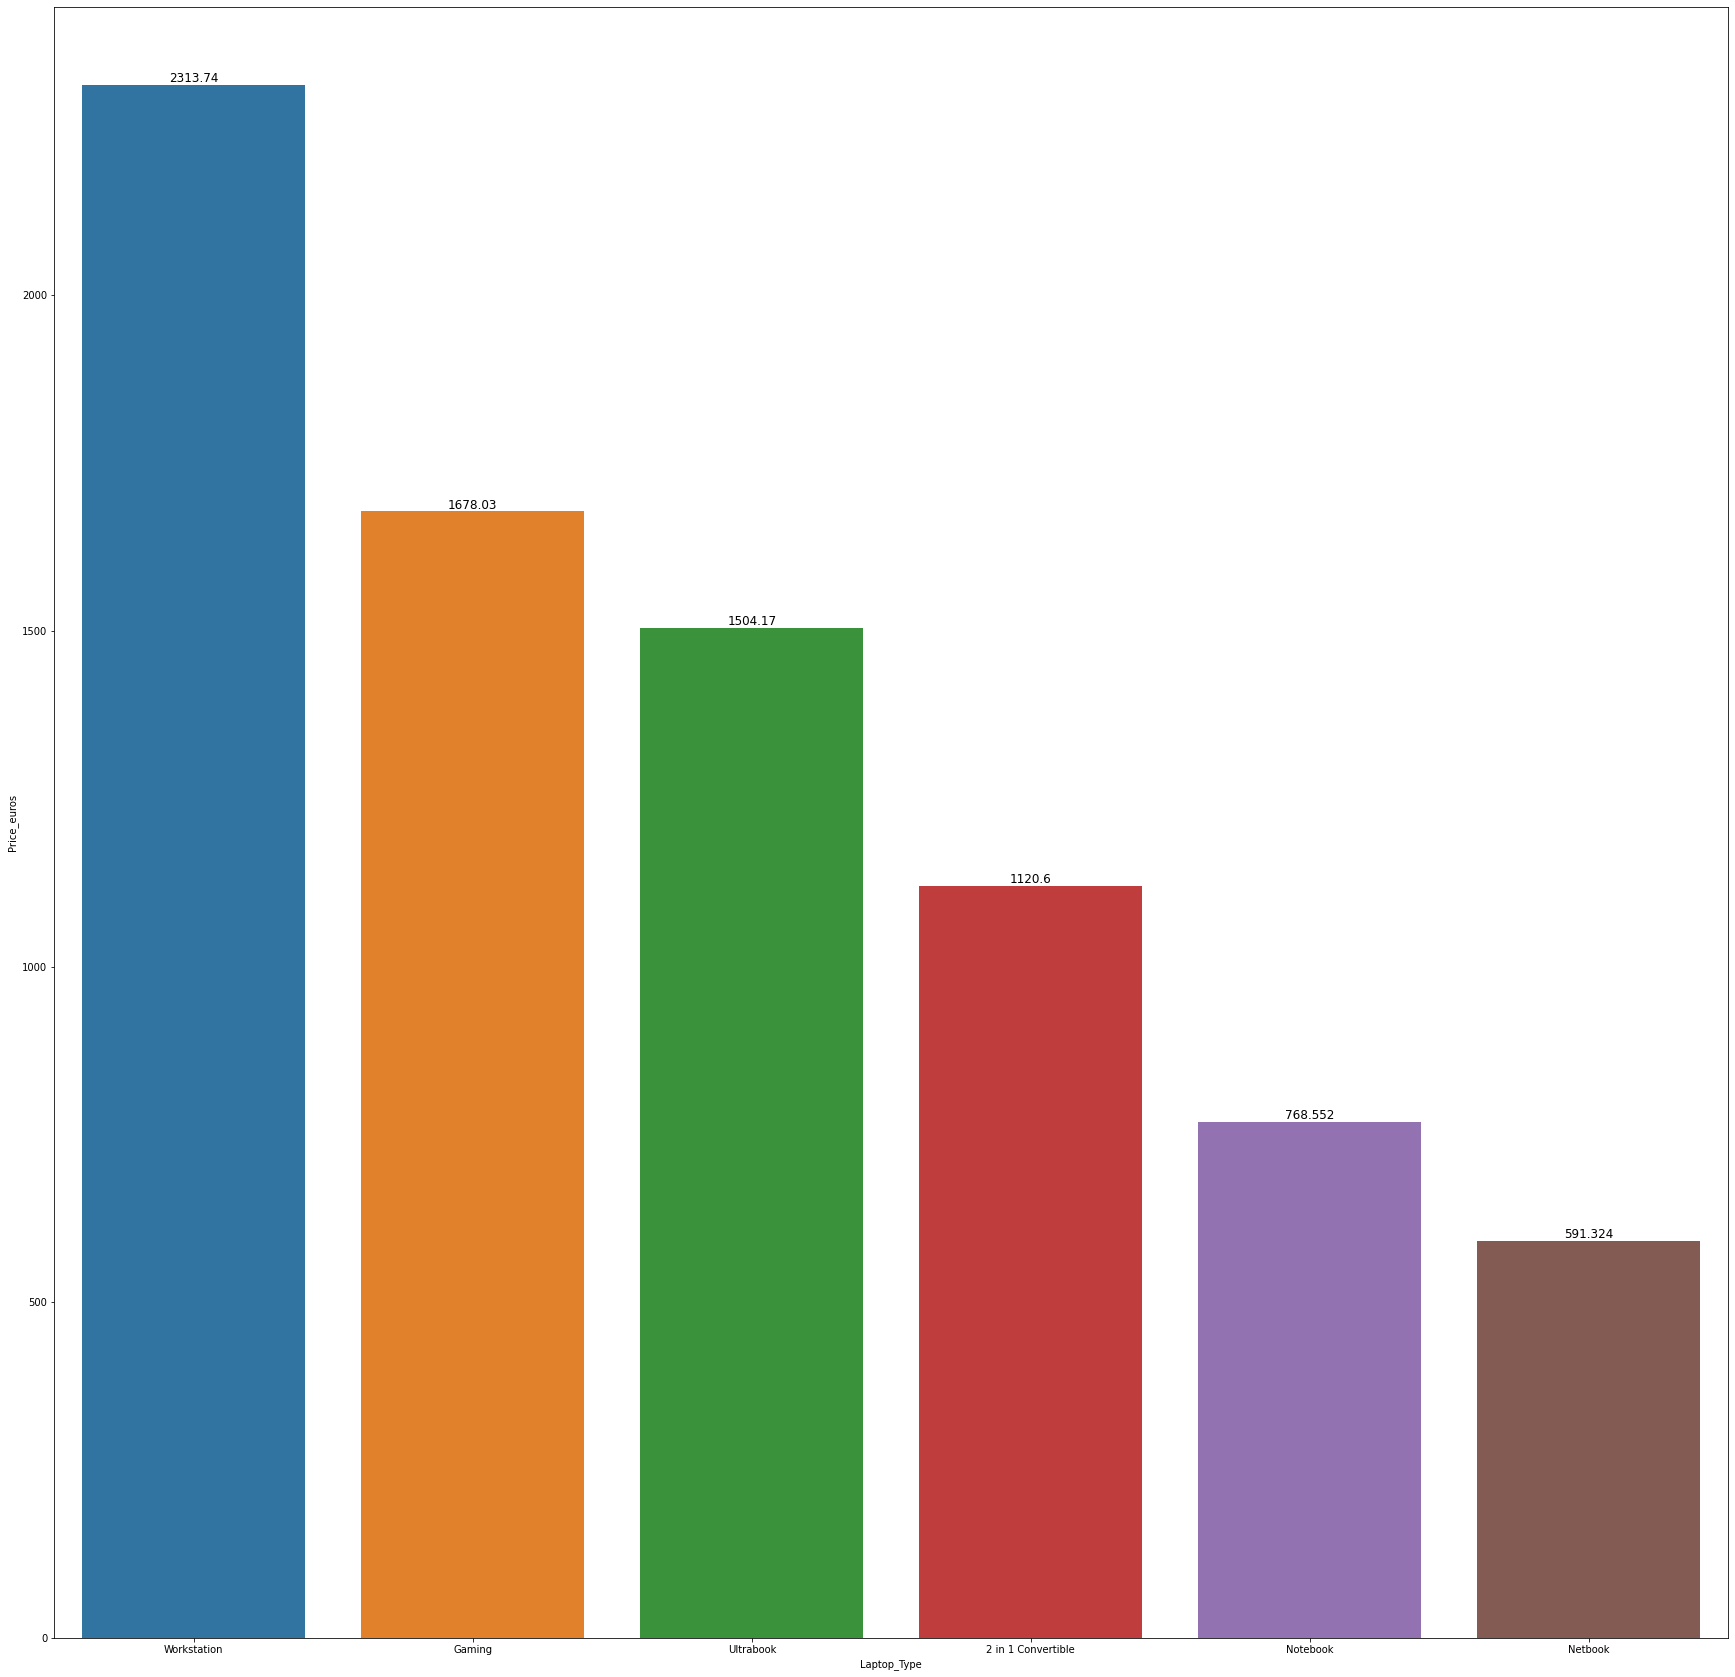

In [112]:
Harga_brand = df_clean.groupby(['Laptop_Brand', 'Product', 'Laptop_Type'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
mean_harga = Harga_brand.groupby(['Laptop_Type'], as_index=False)['Price_euros'].mean().sort_values(by='Price_euros', ascending=False)
plt.figure(figsize=(30,30))
ax = sns.barplot(data=mean_harga, x='Laptop_Type', y='Price_euros', palette='tab10')
ax.bar_label(ax.containers[0], fmt='%g', fontsize=12)
plt.show()

Berdasarkan tipe laptopnya, Tipe Workstation memiliki harga rata-rata termahal yaitu 2313,74 Euro, kemudian laptop Gaming dengan harga 1678,03 Euro, lalu Ultrabook dengan harga 1504,17 Euro, lalu laptop 2 in 1 Convertible 1120,6 Euro, lalu Notebook dengan harga 768,55 Euro dan laptop termurah adalah tipe Netbook dengan harga rata-rata adalah 591,324 Euro. 

## V. Data Preprocessing

Sebelum data dimasukkan kedalam model, data akan dilakukan preprocessing terlebih dahulu. Langkah pertama adalah membagi data kedalam data inference dan data train-test. Data train-test ini akan dibagi kembali menjadi data X Feature dan data y Target.

### V.I Split Data

Membuat data inference

In [41]:
data_inf = df_clean.sample(2, random_state=3)
data_inf

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,Price_euros,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y
712,Dell,Vostro 5568,Notebook,15.6,8,Intel HD Graphics 620,Linux,1.98,726.0,1000,0,0,0,2.5,Intel Core i5,0,1920,1080
745,Acer,Chromebook 14,Notebook,14.0,2,Intel HD Graphics 400,Others,1.68,330.0,0,0,0,32,1.6,Intel Celeron Dual,0,1366,768


Membuat data train-test

In [42]:
data_train_test = df_clean.drop(data_inf.index)
data_train_test

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,Price_euros,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,128,0,0,2.3,Intel Core i5,0,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,0,128,1.8,Intel Core i5,0,1440,900
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,DOS,1.86,575.00,0,256,0,0,2.5,Intel Core i5,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,Mac,1.83,2537.45,0,512,0,0,2.7,Intel Core i7,0,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,Mac,1.37,1803.60,0,256,0,0,3.1,Intel Core i5,0,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,4,Intel HD Graphics 520,Windows,1.80,638.00,0,128,0,0,2.5,Intel Core i7,1,1920,1080
1270,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,16,Intel HD Graphics 520,Windows,1.30,1499.00,0,512,0,0,2.5,Intel Core i7,1,3200,1800
1271,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,2,Intel HD Graphics,Windows,1.50,229.00,0,0,0,64,1.6,Intel Celeron Dual,0,1366,768
1272,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,6,AMD Radeon R5 M330,Windows,2.19,764.00,1000,0,0,0,2.5,Intel Core i7,0,1366,768


Reset Index

In [43]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Memisahkan antara X Feature dan y Target pada data train-test

In [44]:
X = data_train_test.drop('Price_euros', axis=1)
y = data_train_test['Price_euros']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=3)

### V.II EDA for Modeling

Setelah split data, kemudian akan dilakukan EDA untuk melihat distribusi data dan outlier pada feature numerik data train

In [45]:
eda_df = pd.concat([X_train, y_train], axis=1)

eda_df

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y,Price_euros
516,HP,15-bs190od (i5-8250U/4GB/1TB/W10),Notebook,15.6,4,Intel UHD Graphics 620,Windows,2.04,1000,0,0,0,1.6,Intel Core i5,1,1366,768,521.47
1002,Toshiba,Portege Z30-C-16H,Notebook,13.3,4,Intel HD Graphics 520,Windows,1.20,0,128,0,0,2.3,Intel Core i5,0,1920,1080,1195.00
1249,Lenovo,IdeaPad 310-15ISK,Notebook,15.6,6,Nvidia GeForce 920MX,Windows,2.40,0,128,0,0,2.3,Intel Core i3,0,1920,1080,569.00
782,Lenovo,ThinkPad T470s,Ultrabook,14.0,16,Intel HD Graphics 620,Windows,1.70,0,512,0,0,2.7,Intel Core i7,0,1920,1080,2299.00
235,Dell,Inspiron 5567,Notebook,15.6,16,AMD Radeon R7 M445,Linux,2.36,0,256,0,0,2.7,Intel Core i7,0,1920,1080,899.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1021,HP,ProBook 440,Notebook,14.0,8,Nvidia GeForce 930MX,Windows,1.64,0,256,0,0,2.7,Intel Core i7,0,1920,1080,1185.43
789,Vero,K146 (N3350/4GB/32GB/W10),Notebook,14.0,4,Intel HD Graphics 500,Windows,1.22,0,0,0,32,1.1,Intel Celeron Dual,0,1920,1080,202.90
256,HP,15-BW094nd (A6-9220/8GB/128GB/W10),Notebook,15.6,8,AMD Radeon R4 Graphics,Windows,1.91,0,128,0,0,2.5,AMD A6-Series A6-9220,0,1366,768,445.90
968,Dell,XPS 13,2 in 1 Convertible,13.3,16,Intel HD Graphics 615,Windows,1.22,0,512,0,0,1.3,Intel Core i7,1,3200,1800,1899.00


list kolom feature numerik dan kategorik

In [46]:
num_col = ['Inches', 'RAM_GB', 'Weight_Kg', 'HDD_GB', 'SSD_GB', 'Flash_Storage_GB', 'CPU_GHz', 'Resolution_X', 'Resolution_Y']
cat_col = ['Laptop_Brand', 'Product', 'Laptop_Type', 'OpSys', 'CPU_Model', 'GPU', 'TouchScreen']

### V.II.I Distribusi Feature Numerik

Membuat feature numerik

In [47]:
feat_num = eda_df[num_col]

Memplot distribusi feature numerik

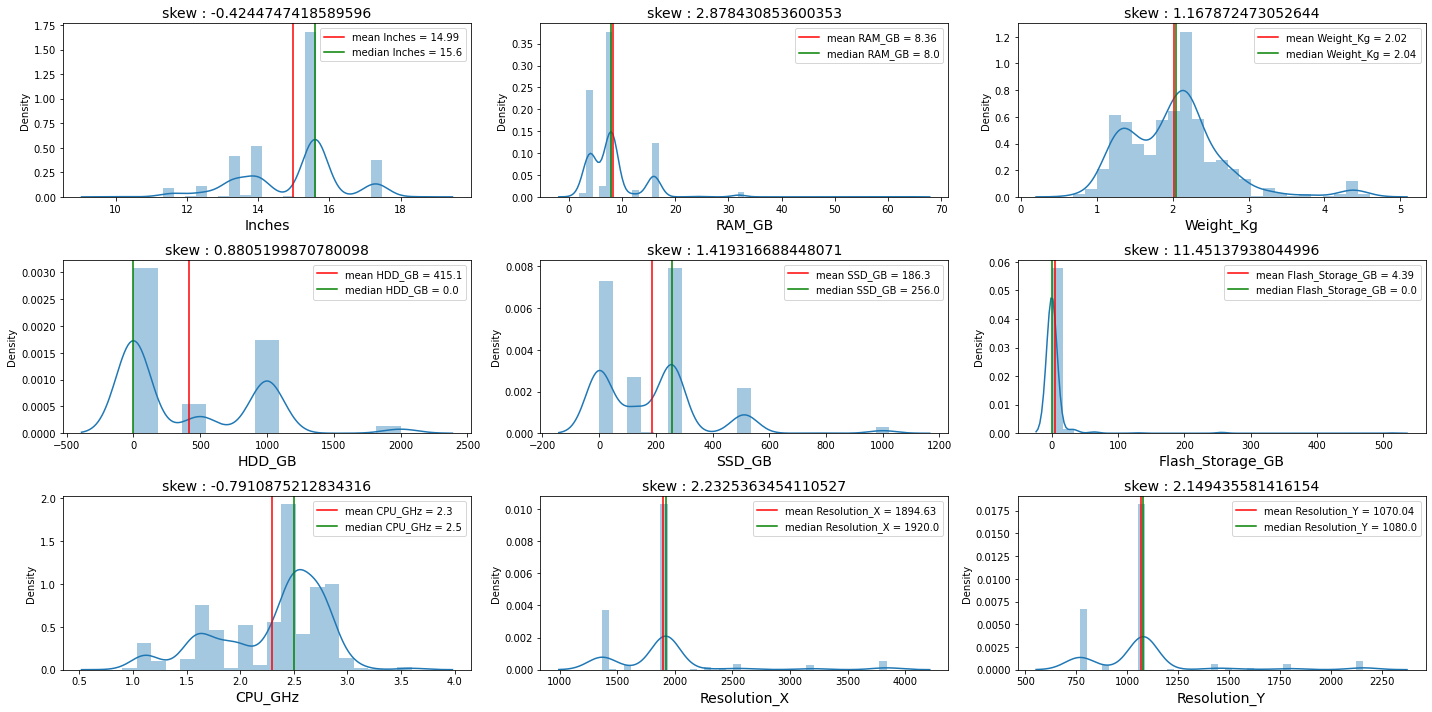

In [48]:
plt.figure(figsize=(20,10))

for idx, col in enumerate(feat_num):
        plt.subplot(3,3,idx+1)
        sns.distplot(feat_num[col])
        plt.title(f'skew : {feat_num[col].skew()}', fontsize=14)
        plt.axvline(x=feat_num[col].mean(), color='red', label=f'mean {col} = {round(feat_num[col].mean(), 2)}')
        plt.axvline(x=feat_num[col].median(), color='green', label=f'median {col} = {feat_num[col].median()}')
        plt.legend()
        plt.xlabel(f'{col}', fontsize=14)
        plt.tight_layout()

Terlihat bahwa feature numerik kebanyakan memiliki distribusi skew right karena nilai skewnya diatas 0,5 dan ada juga yang terdistribusi skew left yaitu `CPU_GHz`, dan terdapat feature yang terdistribusi normal yaitu `Inches`.

### V.II.II Outliers Feature Numerik

Pengecekan Outliers pada feature numerik

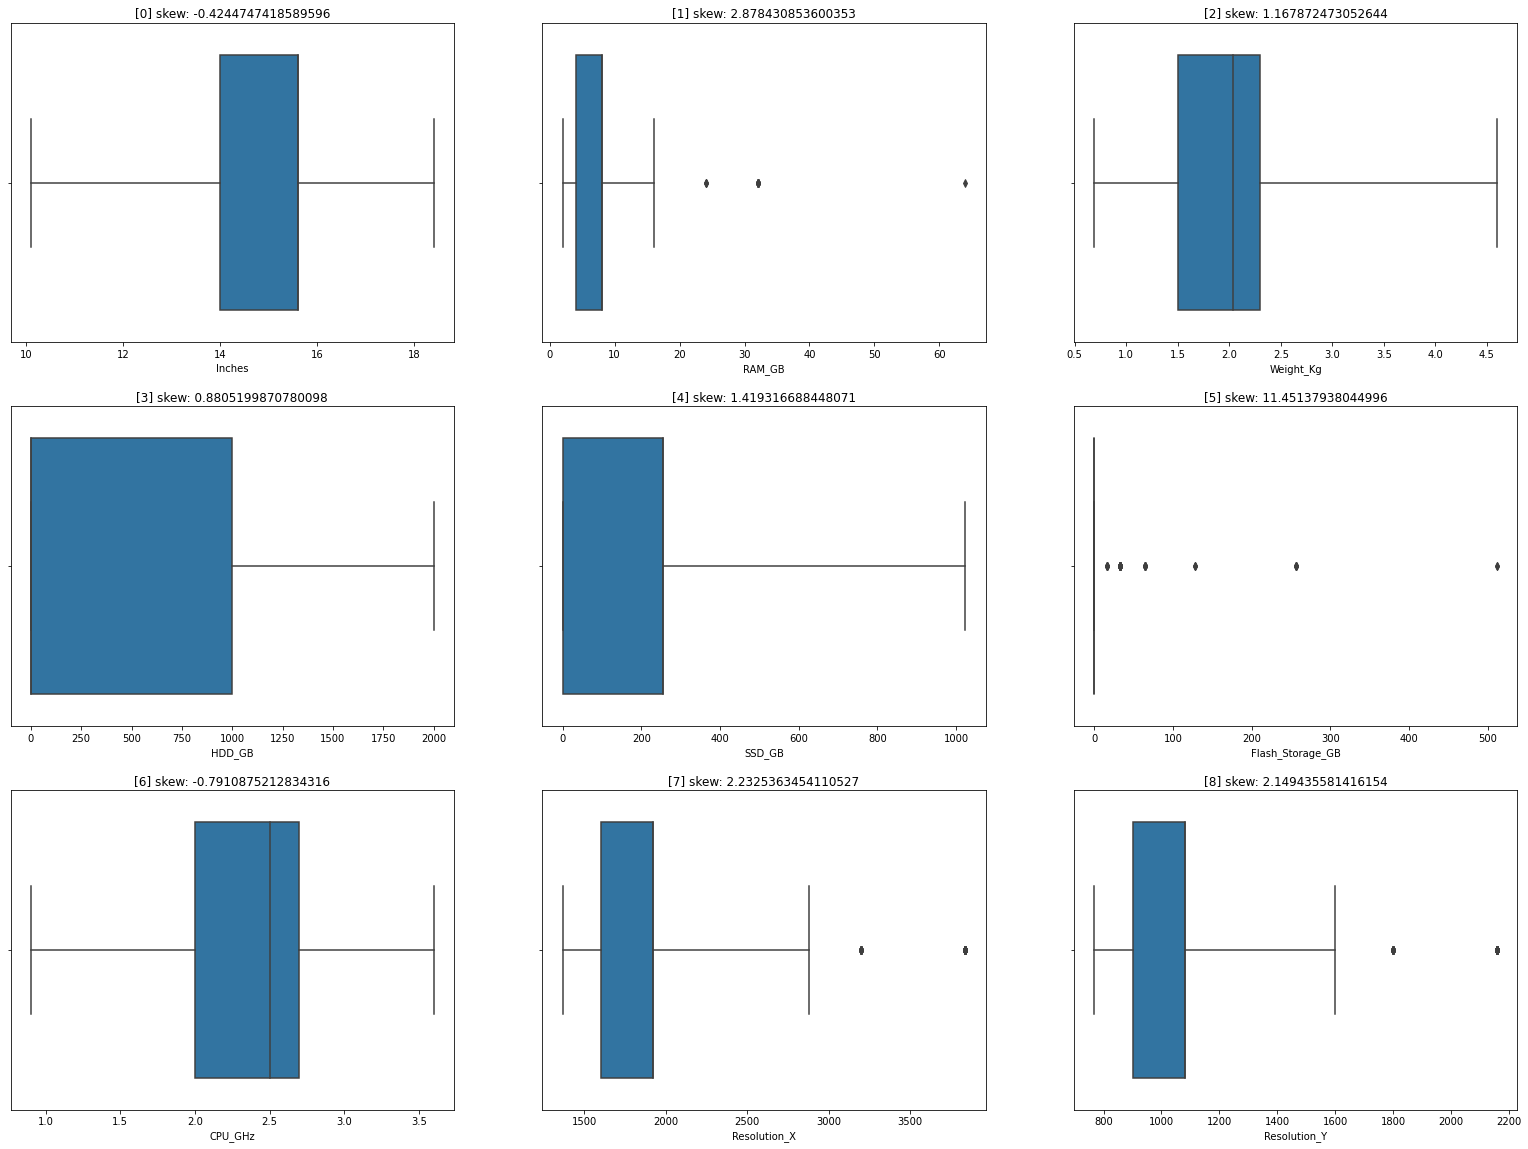

In [49]:
fig, ax = plt.subplots(ncols=3,nrows=3, figsize=[27,20])
ax = ax.flatten()

for idx, col in enumerate(feat_num.columns):
    sns.boxplot(feat_num[col], ax=ax[idx], whis=3)
    ax[idx].set_title(f'{[idx]} skew: {feat_num[col].skew()}')

In [50]:
def outlier_analysis(train,col):
  skewness = train[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = train[col].mean() + 3*train[col].std()
    lower = train[col].mean() - 3*train[col].std()
  elif (skewness>=-1 and skewness<=-0.5) or (skewness>=0.5 and skewness<=1):
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (1.5*IQR)
    lower = Q1 - (1.5*IQR)
  else:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + (3*IQR)
    lower = Q1 - (3*IQR)
  
  # no_outliers = train[(train[col]>=lower) & (train[col]<=upper)]
  outliers = train[(train[col]<lower) | (train[col]>upper)]
  print('percentage outlier from',i,':',outliers.shape[0]/train.shape[0] * 100, '%', '  ', 'skew :', train[col].skew())
  return outliers, upper, lower

for i in list(feat_num.columns):
  outlier_analysis(feat_num,i)

percentage outlier from Inches : 0.19665683382497542 %    skew : -0.4244747418589596
percentage outlier from RAM_GB : 1.671583087512291 %    skew : 2.878430853600353
percentage outlier from Weight_Kg : 0.0 %    skew : 1.167872473052644
percentage outlier from HDD_GB : 0.0 %    skew : 0.8805199870780098
percentage outlier from SSD_GB : 0.0 %    skew : 1.419316688448071
percentage outlier from Flash_Storage_GB : 5.2114060963618485 %    skew : 11.45137938044996
percentage outlier from CPU_GHz : 0.09832841691248771 %    skew : -0.7910875212834316
percentage outlier from Resolution_X : 5.408062930186824 %    skew : 2.2325363454110527
percentage outlier from Resolution_Y : 5.604719764011799 %    skew : 2.149435581416154


Feature `Resolution_X` dan `Resolution_Y` merupakan feature yang menjelaskan kualitas layar laptop dengan satuan pixel dan ini dapat disatukan menjadi 1 buah feature yaitu `PPI` yang dimana feature ini merupakan nilai pixel per inch dari layar laptop.

$PPI = \frac{\sqrt{X^2+Y^2}}{Inches}$

dimana X adalah jumlah pixel pada kolom `Resolution_X`, Y adalah jumlah pixel pada kolom `Resolution_Y`, `Inches` adalah diagonal layar laptop dalam satuan inch.

In [51]:
eda_df['PPI'] = (((eda_df['Resolution_X']**2) + (eda_df['Resolution_Y']**2))**0.5/eda_df['Inches'])
eda_df.head(2)

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y,Price_euros,PPI
516,HP,15-bs190od (i5-8250U/4GB/1TB/W10),Notebook,15.6,4,Intel UHD Graphics 620,Windows,2.04,1000,0,0,0,1.6,Intel Core i5,1,1366,768,521.47,100.454670
1002,Toshiba,Portege Z30-C-16H,Notebook,13.3,4,Intel HD Graphics 520,Windows,1.20,0,128,0,0,2.3,Intel Core i5,0,1920,1080,1195.00,165.632118


Mengecek outlier pada feature PPI

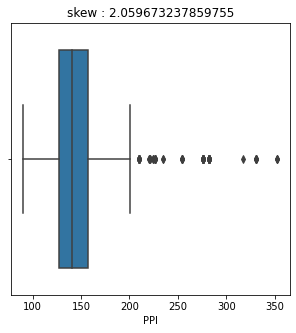

In [52]:
feat_ppi = eda_df['PPI']
plt.figure(figsize=(5,5))
sns.boxplot(data=eda_df, x='PPI')
plt.title(f'skew : {feat_ppi.skew()}')
plt.show()

In [53]:
for i in ['PPI']:
    outlier_analysis(eda_df,i)

percentage outlier from PPI : 5.408062930186824 %    skew : 2.059673237859755


Setelah feature resolusi digabungkan maka outliers dari feature tersebut menurun dan berada di bawah angka 10 %. Sehingga Saya memutuskan untuk menggunakan Feature `PPI` untuk menjelaskan resolusi layar.

Laptop memiliki penyimpanan yang dapat berasal dari HDD, SSD, dan Flash Storage atau pun gabungan dari beberapa jenis penyimpanan. Untuk itu, saya memutuskan untuk membuat feature `Total_Storage_GB` untuk menjelaskan jumlah storage yang digunakan pada laptop.

In [54]:
eda_df['Total_Storage_GB'] = eda_df['HDD_GB'] + eda_df['SSD_GB'] + eda_df['Flash_Storage_GB']

Mengecek outlier pada feature `Total_Storage_GB`

In [55]:
for i in ['Total_Storage_GB']:
    outlier_analysis(eda_df,i)

percentage outlier from Total_Storage_GB : 0.0 %    skew : 1.0705768033977252


Feaeture Total_Storage_GB tidak memiliki outliers dan saya memutuskan untuk menggunakan Feature `Total_Storage_GB` untuk menjelaskan jumlah storage yang diganakan pada laptop.

Komponen penyusun laptop seperti layar, RAM, Storage, CPU memiliki harga yang berbeda bergantung spesifikasi komponennya. Karena itu, outliers pada RAM dan PPI akan dilakukan trimming dengan metode iqr dengan fold 3.

Handling Outlier dengan trimming

In [56]:
trims = OutlierTrimmer(capping_method='iqr', tail='both', fold=3, variables=['RAM_GB', 'PPI'])
eda_df_clean = trims.fit_transform(eda_df)

Dari EDA Modeling yang telah dilakukan, kita dapat membuat list feature numerik sebagai berikut

In [57]:
num_col = ['Inches', 'PPI', 'CPU_GHz', 'RAM_GB', 'Weight_Kg', 'Total_Storage_GB']

### V.II.III Pengecekan Multikolinearitas Pada Feature Numerik

Pengecekan multikolinearitas dari sebuah feature akan di cek menggunakan VIF. Feature yang memiliki Threshold diatas 10 % tidak akan digunakan karena feature tersebut saling berhubungan dan menimbulkan ambiguitas terhadap target.

#### VIF Feature `Inches` dan `PPI`

In [58]:
# the independent variables set
X = eda_df_clean[['Inches', 'PPI']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

  feature        VIF
0  Inches  16.452918
1     PPI  16.452918


Feature `Inches` dan `PPI` memiliki nilai VIF diatas 10 sehingga akan dipilih feature PPI saja.

In [59]:
num_col = ['PPI', 'CPU_GHz', 'RAM_GB', 'Weight_Kg', 'Total_Storage_GB']

### V.III Korelasi Featuere Numerik

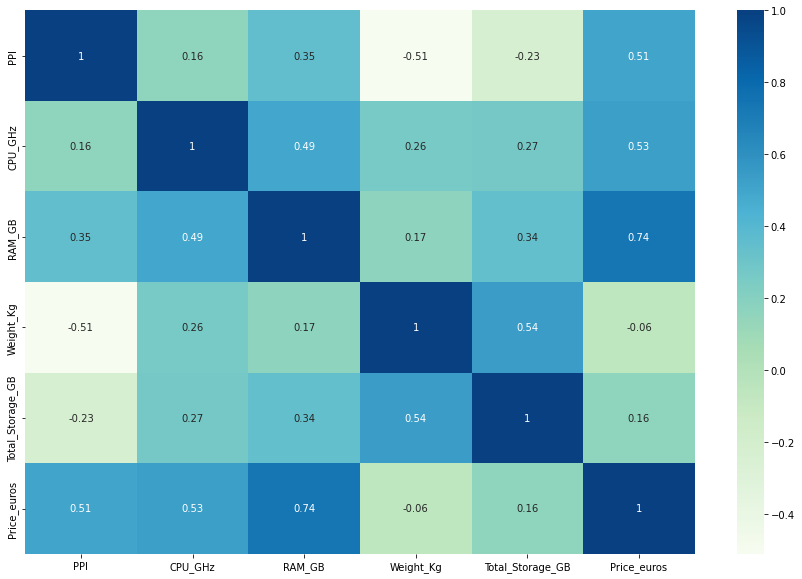

In [60]:
kor_feat = eda_df_clean[num_col]
kor_feat['Price_euros'] = eda_df['Price_euros']
plt.figure(figsize=(15, 10))
sns.heatmap(round(kor_feat.corr(method='spearman'), 2), 
            annot=True, mask=None, cmap='GnBu')
plt.show()

Dari hasil korelasi di atas, terlihat bahwa feature `Weight_Kg` tidak memiliki hubungan terhadap target `Price_euros`. Berat dari laptop tidak mempengaruhi harga. 

Feature `Total_Storage_GB` memiliki korelasi yang kecil terhadap target `Price_euros` namun karena Penyimpanan merupakan komponen penting pada sebuah laptop maka feature ini tetap digunakan.

Dari hasil korelasi, dapat dibuat list kolom feature numerik yang akan digunakan pada pemodelan yaitu

In [61]:
num_col_final = ['PPI', 'CPU_GHz', 'RAM_GB', 'Total_Storage_GB']

### V.IV EDA Feature Kategorik

Disini saya ingin mengetahui apa saja yang terdapat pada feature kategorik

In [62]:
feat_cat = eda_df_clean[cat_col]

Feature `Laptop_Brand`

In [63]:
feat_cat['Laptop_Brand'].value_counts()

Lenovo       232
HP           207
Dell         198
Asus         118
Acer          79
Toshiba       39
MSI           27
Apple         15
Mediacom       7
Samsung        6
Microsoft      6
Xiaomi         4
Razer          3
Vero           3
Chuwi          2
Huawei         2
Google         1
Fujitsu        1
LG             1
Name: Laptop_Brand, dtype: int64

In [64]:
for i in ['Samsung', 'Mediacom', 'Razer', 'Microsoft', 'Xiaomi', 'Chuwi', 'Huawei', 'Google', 'Fujitsu', 'LG', 'Vero']:
    eda_df_clean['Laptop_Brand'] = eda_df_clean['Laptop_Brand'].replace(i, 'Others Brand')

In [65]:
eda_df_clean['Laptop_Brand'].value_counts()

Lenovo          232
HP              207
Dell            198
Asus            118
Acer             79
Toshiba          39
Others Brand     36
MSI              27
Apple            15
Name: Laptop_Brand, dtype: int64

Feature `Product` dan `Laptop_Type`

In [66]:
feat_cat['Product'].value_counts()

250 G6                                     19
Inspiron 3567                              18
Legion Y520-15IKBN                         16
ProBook 450                                14
Vostro 3568                                13
                                           ..
Swift SF114-31-P5HY                         1
17-Y002nv (A10-9600P/6GB/2TB/Radeon         1
Portege Z30-C-1CW                           1
V330-15IKB (i5-8250U/8GB/256GB/FHD/W10)     1
15-BW094nd (A6-9220/8GB/128GB/W10)          1
Name: Product, Length: 501, dtype: int64

In [67]:
feat_cat['Laptop_Type'].value_counts()

Notebook              573
Ultrabook             131
Gaming                128
2 in 1 Convertible     79
Netbook                21
Workstation            19
Name: Laptop_Type, dtype: int64

Kedua feature ini menjelaskan model laptop yang dikeluarkan oleh brand laptop. Disini karena unique value dari `Product` sangatlah banyak, saya memutuskan untuk menggunakan feature `Laptop_Type` untuk menjelaskan model laptop yang dikeluarkan oleh brand laptop tersebut.

Feature `OpSys`

In [68]:
feat_cat['OpSys'].value_counts()

Windows    813
DOS         58
Linux       45
Others      20
Mac         15
Name: OpSys, dtype: int64

Laptop kebanyakan menggunakan sistem operasi berupa Windows, lalu tanpa sistem operasi (DOS), dan Linux.

Feature `CPU_Model`

In [69]:
feat_cat.groupby(['CPU_Model'], as_index=False)['Laptop_Brand'].count()

,CPU_Model,Laptop_Brand
0,AMD A10-Series 9600P,2
1,AMD A10-Series A10-9620P,2
2,AMD A12-Series 9700P,1
3,AMD A12-Series 9720P,7
4,AMD A4-Series 7210,1
5,AMD A6-Series 7310,1
6,AMD A6-Series 9220,6
7,AMD A6-Series A6-9220,2
8,AMD A8-Series 7410,3
9,AMD A9-Series 9410,1


Dari hasil diatas, dapat diketahui bahwa laptop kebanyakan menggunakan CPU dari Intel yaitu model i7, i5, dan i3.

Feature `GPU`

In [70]:
feat_cat.groupby(['GPU'], as_index=False)['Laptop_Brand'].count()

,GPU,Laptop_Brand
0,AMD FirePro W4190M,2
1,AMD FirePro W6150M,1
2,AMD R17M-M1-70,1
3,AMD R4 Graphics,1
4,AMD Radeon 520,16
5,AMD Radeon 530,34
6,AMD Radeon Pro 555,1
7,AMD Radeon Pro 560,1
8,AMD Radeon R2,4
9,AMD Radeon R2 Graphics,2


Feature `TouchScreen`

In [71]:
feat_cat['TouchScreen'].value_counts()

0    842
1    109
Name: TouchScreen, dtype: int64

Terlihat bahwa pada data train terdapat 873 laptop yang tidak menggunakan teknologi touchscreen dan 144 laptop menggunakan teknologi touchscreen.

Dari EDA yang telah dilakukan diatas, dapat dibuat list kolom kategori yaitu

In [72]:
cat_col_final = ['Laptop_Brand', 'Laptop_Type', 'OpSys', 'CPU_Model', 'GPU', 'TouchScreen']

### V.V Encoding dan Seleksi Feature Kategorik

Feature kategori akan di encoding dan di seleksi menggunkan ANOVA score terhadap target `Price_euros`

In [73]:
feat_cat_kor = eda_df_clean[cat_col_final].copy()
ohe = OneHotEncoder(sparse=False)
encoded = ohe.fit_transform(feat_cat_kor)
colum_encod = ohe.get_feature_names(cat_col_final)
feat_cat_encoded = pd.DataFrame(encoded, columns=colum_encod)

In [74]:
feat_cat_encoded['Price_euros'] = eda_df_clean['Price_euros'].values

In [75]:
f_test = SelectKBest(score_func=f_classif, k=4)
fit = f_test.fit(feat_cat_encoded[colum_encod], feat_cat_encoded['Price_euros'])
result = pd.DataFrame(fit.scores_, index=feat_cat_encoded[colum_encod].columns, columns=['ANOVA_SCORE'])
result.sort_values(by='ANOVA_SCORE', ascending=False)

,ANOVA_SCORE
GPU_AMD Radeon R5 M315,inf
CPU_Model_Intel Atom X5-Z8350,inf
CPU_Model_AMD A9-Series 9410,inf
GPU_Nvidia GeForce GTX1060,inf
CPU_Model_AMD A6-Series A6-9220,inf
CPU_Model_AMD E-Series 6110,inf
CPU_Model_AMD E-Series 9000e,inf
GPU_Nvidia Quadro M1200,inf
GPU_Nvidia Quadro M2000M,inf
GPU_Intel Iris Plus Graphics 650,inf


Dari hasil diatas, terdapat beberapa jenis Model CPU dan GPU yang memiliki score yang kecil namun bila dilihat secara keseluruhan `GPU_Model` dan `CPU_Model` memiliki hubungan terhadap Target. Sehingga seluruh feature kategori yang telah ditetapkan sebelumnya akan dipakai seluruhnya.

List Feature yang digunakan

In [76]:
num_col_final = ['PPI', 'CPU_GHz', 'RAM_GB', 'Total_Storage_GB']
cat_col_final = ['Laptop_Brand', 'Laptop_Type', 'OpSys', 'CPU_Model', 'GPU', 'TouchScreen']
num_cat_target = ['PPI', 'CPU_GHz', 'RAM_GB', 'Total_Storage_GB', 'Laptop_Brand', 'Laptop_Type', 'OpSys', 'CPU_Model', 'GPU', 'TouchScreen', 'Price_euros']

Data train final

In [77]:
eda_df_final = eda_df_clean[num_cat_target]

### V.VI Data Test

concat data test

In [78]:
data_test = pd.concat([X_test,y_test], axis=1)
data_test

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y,Price_euros
712,Asus,VivoBook E403NA,Notebook,14.0,4,Intel HD Graphics 500,Windows,1.50,0,0,0,32,1.1,Intel Celeron Dual,0,1920,1080,298.00
745,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 520,Windows,1.86,0,256,0,0,2.0,Intel Core i3,0,1920,1080,539.00
692,HP,ZBook 17,Workstation,17.3,8,Nvidia Quadro M1200,Windows,3.14,500,0,0,0,2.8,Intel Core i7,0,1920,1080,1907.99
590,Asus,TP501UA-CJ131T (i5-7200U/8GB/1TB/W10),2 in 1 Convertible,15.6,8,Intel HD Graphics 520,Windows,2.20,1000,0,0,0,2.5,Intel Core i5,1,1366,768,739.00
343,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,16,Intel UHD Graphics 620,Windows,1.40,0,512,0,0,1.8,Intel Core i7,1,3840,2160,2099.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Dell,Inspiron 5570,Notebook,15.6,8,AMD Radeon 530,Windows,2.20,0,256,0,0,1.6,Intel Core i5,0,1920,1080,800.00
1022,Dell,Latitude E5570,Notebook,15.6,8,Intel HD Graphics 520,Windows,2.09,500,0,0,0,2.4,Intel Core i5,0,1920,1080,1046.44
573,Lenovo,Thinkpad E570,Notebook,15.6,8,Intel HD Graphics 620,Windows,2.30,0,256,0,0,2.5,Intel Core i5,0,1920,1080,830.00
247,Asus,Rog G701VIK-BA060T,Gaming,17.3,16,Nvidia GeForce GTX 1080,Windows,3.60,0,256,0,0,2.9,Intel Core i7,0,1920,1080,2999.00


Membuat Kolom `PPI` dan `Total_Storage_GB`

In [79]:
data_test['PPI'] = (((data_test['Resolution_X']**2) + (data_test['Resolution_Y']**2))**0.5/data_test['Inches'])
data_test['Total_Storage_GB'] = data_test['HDD_GB'] + data_test['SSD_GB'] + data_test['Flash_Storage_GB']

Membuat kolom data test final yang telah dilakukan seleksi feature

In [80]:
data_test_final = data_test[num_cat_target]

### V.VII Split Data : X Feature dan y Target

In [81]:
X_train = eda_df_final.drop('Price_euros',axis=1).copy()
y_train = eda_df_final['Price_euros']

X_test = data_test_final.drop('Price_euros',axis=1).copy()
y_test = data_test_final['Price_euros']

### V.V Preprocessing

Pipeline Numerical

Pipeline Numerical berisi langkah-langkah yang dilakukan pada feature numerik yaitu feature scaling

In [82]:
num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

Pipeline Categorical

Pipeline Categorical berisi langkah-langkah yang dilakukan pada feature ketegori yaitu One Hot Encoder

In [83]:
cat_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False, handle_unknown='ignore'))
    ])

Full Pipeline 

Menggabungkan langkah pipeline yang dilakukan

In [84]:
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_col_final),
        ("cat_ohe", cat_pipeline, cat_col_final)
    ])

Melakukan preprocessing pada X train

In [85]:
X_train_pipe = full_pipeline.fit_transform(X_train)

Menerapkan preprocessing pada X test

In [86]:
X_test_pipe = full_pipeline.transform(X_test)

## VI. Model Definition

Model yang akan digunakan adalah Linear Regression, Ridge, Decision Tree, dan Random Forest

Definisi Model Linear Regression

In [87]:
linreg = LinearRegression()

Definisi Model Ridge Regression

In [88]:
rid_model = Ridge()

Definisi Model Decision Tree Regression

In [89]:
dt_model = DecisionTreeRegressor(random_state=0)

Definisi Model Random Forest Regression

In [90]:
rf_model = RandomForestRegressor(random_state=0)

## VII. Model Training

Training Model Linear Regression

In [91]:
linreg.fit(X_train_pipe, y_train)

LinearRegression()

Training Model Random Forest Regression

In [92]:
rf_model.fit(X_train_pipe, y_train)

RandomForestRegressor(random_state=0)

Training Model Decision Tress Regression

In [93]:
dt_model.fit(X_train_pipe, y_train)

DecisionTreeRegressor(random_state=0)

Training Model Ridge Regression

In [94]:
rid_model.fit(X_train_pipe, y_train)

Ridge()

## VIII. Model Evaluation

### VIII.I Model Linear Regression

In [95]:
pred_train_lr = linreg.predict(X_train_pipe)
pred_test_lr = linreg.predict(X_test_pipe)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_lr))
print("R2 Score:",r2_score(y_train,pred_train_lr))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_lr))
print("R2 Score:",r2_score(y_test,pred_test_lr))

==================== TRAINING ====================
Mean absolute error: 176.81731861198736
R2 Score: 0.8333357539038568
==================== TEST ====================
Mean absolute error: 129925772316783.9
R2 Score: -4.66993162461108e+23


Model `linear regression` memiliki `training` yang `baik` dengan `MAE 176,8` dan `R2 Score 0,83` namun sangat buruk saat model di `test` dengan data baru selain data train, Model linear regression `sangat overfit` sehingga ketika dimasukkan data baru maka `eror` yang dihasilkan `sangat tinggi` dimana R2 Score -4,67 yang artinya model benar-benar tidak bisa memprediksi harga.

### VIII.II Model Random Forest

In [96]:
pred_train_rf = rf_model.predict(X_train_pipe)
pred_test_rf = rf_model.predict(X_test_pipe)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rf))
print("R2 Score:",r2_score(y_train,pred_train_rf))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rf))
print("R2 Score:",r2_score(y_test,pred_test_rf))

==================== TRAINING ====================
Mean absolute error: 69.55884853627913
R2 Score: 0.9674994858024376
==================== TEST ====================
Mean absolute error: 209.8104654249497
R2 Score: 0.7674104533508822


Model `Random Forest` memiliki `training` yang `sangat baik` dengan `MAE 69,56` dan `R2 Score 0,97` namun saat di `test` hasil prediksinya semakin buruk dimana `MAE 209,81` dan `R2 Score 0,77`. Model Random Forest masuk dalam kategori overfit namun jauh lebih baik dari Model Linear Regression karena model masih dapat memprediksi harga.

### VIII.III Model Ridge

In [97]:
pred_train_rid = rid_model.predict(X_train_pipe)
pred_test_rid = rid_model.predict(X_test_pipe)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

==================== TRAINING ====================
Mean absolute error: 185.2975041108365
R2 Score: 0.8225701606143181
==================== TEST ====================
Mean absolute error: 223.45953095340502
R2 Score: 0.7753108910702026


Model `Ridge` memiliki training yang `baik` dengan `MAE 185,29` dan `R2 Score 0,82` namun saat di `test` hasilnya semakin buruk dengan `MAE 223,46` dan `R2 Score 0,78`. Model Ridge masuk dalam kategori goodfit namun nilai error masih cukup tinggi.

### VIII.IV Model Decision Tree

In [98]:
pred_train_dt = dt_model.predict(X_train_pipe)
pred_test_dt = dt_model.predict(X_test_pipe)

print("="*20,"TRAINING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_dt))
print("R2 Score:",r2_score(y_train,pred_train_dt))
print("="*20,"TEST","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_dt))
print("R2 Score:",r2_score(y_test,pred_test_dt))

==================== TRAINING ====================
Mean absolute error: 19.50347353662811
R2 Score: 0.9890846922799847
==================== TEST ====================
Mean absolute error: 270.7798562091503
R2 Score: 0.6439717697690903


Model `Decision Tree` memiliki `training` yang `sangat baik` dengan `MAE 19,50` dan `R2 Score 0,99` namun saat di `test` hasil prediksinya semakin buruk dimana `MAE 270,78` dan `R2 Score 0,64`. Model Decision Tree masuk dalam kategori overfit namun jauh lebih baik dari Model Linear Regression karena model masih dapat memprediksi harga namun lebih buruk dari Model Random Forest.

Dari hasil evaluasi dapat disimpulkan model yang terbaik adalah
1. Ridge
2. Random Forest
3. Decision Tree

Model Linear Regression tidak bisa digunakan untuk memprediksi harga laptop pada kasus ini.

### VIII.V Hyperparameter Tuning

Pada bagian ini akan dilakukan hyperparameter tuning pada model Ridge.

In [99]:
paramsrid = [
    {                                                      
     'solver': ['auto','svd','cholesky', 'sparse_cg', 'lsqr', 'saga', 'lbfgs'],       #7
     'alpha': [0.1, 0.5, 0.7, 1]                                            #4
     }    #   7*4=28 kombinasi      
  ]

grid_search = GridSearchCV(rid_model, paramsrid,
                           scoring='r2', n_jobs= -1,
                           return_train_score=True)
                           
grid_search.fit(X_train_pipe, y_train)

GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid=[{'alpha': [0.1, 0.5, 0.7, 1],
                          'solver': ['auto', 'svd', 'cholesky', 'sparse_cg',
                                     'lsqr', 'saga', 'lbfgs']}],
             return_train_score=True, scoring='r2')

Menampilkan parameter terbaik

In [100]:
grid_search.best_params_

{'alpha': 1, 'solver': 'auto'}

Menampilkan hasil score prediksi

In [101]:
grid_search.best_score_

0.7535951530647276

Dari hasil hypertuning, parameter terbaik adalah `alpha` = 1 dan `solver` = auto dimana nilai ini adalah nilai base dari model Ridge

In [102]:
best_model = grid_search.best_estimator_

prediksi menggunakan model yang telah dituning dan dilakukan evaluasi

In [103]:
pred_train_rid_tuning = best_model.predict(X_train_pipe)
pred_test_rid_tuning = best_model.predict(X_test_pipe)

print("="*20,"TRAINING SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid))
print("R2 Score:",r2_score(y_train,pred_train_rid))

print("="*20,"TEST SEBELUM TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid))
print("R2 Score:",r2_score(y_test,pred_test_rid))

print("="*20,"TRAINING SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_train,pred_train_rid_tuning))
print("R2 Score:",r2_score(y_train,pred_train_rid_tuning))

print("="*20,"TEST SETELAH TUNING","="*20)
print("Mean absolute error:",mean_absolute_error(y_test,pred_test_rid_tuning))
print("R2 Score:",r2_score(y_test,pred_test_rid_tuning))



==================== TRAINING SEBELUM TUNING ====================
Mean absolute error: 185.2975041108365
R2 Score: 0.8225701606143181
==================== TEST SEBELUM TUNING ====================
Mean absolute error: 223.45953095340502
R2 Score: 0.7753108910702026
==================== TRAINING SETELAH TUNING ====================
Mean absolute error: 185.2975041108365
R2 Score: 0.8225701606143181
==================== TEST SETELAH TUNING ====================
Mean absolute error: 223.45953095340502
R2 Score: 0.7753108910702026


Dari hasil tuning, tidak ada perubahan karena parameter yang terbaik memang menggunakan Model base dari Ridge.

### VIII.VI Combine Pipeline : Preprocessing + Model

Pada bagian ini, akan dilakukan penggabungan model Ridge ke dalam pipeline sebelumnya agar model dapat bekerja saat deployment.

In [104]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("regression", best_model)
])

all_process.fit(X_train, y_train)
hasil = all_process.predict(X_test)

print("Mean absolute error:",mean_absolute_error(y_test,hasil))
print("R2 Score:",r2_score(y_test,hasil))

Mean absolute error: 223.45953095340502
R2 Score: 0.7753108910702026


## IX. Model Inference

Data Inference

In [105]:
data_inf

,Laptop_Brand,Product,Laptop_Type,Inches,RAM_GB,GPU,OpSys,Weight_Kg,Price_euros,HDD_GB,SSD_GB,Hybrid_GB,Flash_Storage_GB,CPU_GHz,CPU_Model,TouchScreen,Resolution_X,Resolution_Y
0,Dell,Vostro 5568,Notebook,15.6,8,Intel HD Graphics 620,Linux,1.98,726.0,1000,0,0,0,2.5,Intel Core i5,0,1920,1080
1,Acer,Chromebook 14,Notebook,14.0,2,Intel HD Graphics 400,Others,1.68,330.0,0,0,0,32,1.6,Intel Celeron Dual,0,1366,768


Membuat feature PPI dan Total Storage

In [106]:
data_inf['PPI'] = (((data_inf['Resolution_X']**2) + (data_inf['Resolution_Y']**2))**0.5/data_inf['Inches'])
data_inf['Total_Storage_GB'] = data_inf['HDD_GB'] + data_inf['SSD_GB'] + data_inf['Flash_Storage_GB']
data_inf_final = data_inf[num_cat_target]


Preprocessing dan Prediksi

In [107]:
all_process.predict(data_inf_final)

array([946.81239828,  18.30144798])

## X. Model Saving

Sebelum melakukan deploy, model yang telah dibuat harus disimpan

In [108]:
# save model
pickle.dump(all_process, open("price_pred.pkl", "wb"))

In [109]:
set_config(display='diagram')

In [110]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['PPI', 'CPU_GHz', 'RAM_GB',
                                                   'Total_Storage_GB']),
                                                 ('cat_ohe',
                                                  Pipeline(steps=[('ohe_enc',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Laptop_Brand',
                                                   'Laptop_Type', 'OpSys',
                                                   'CPU_Model', 'GPU',
                                                   'TouchScreen'])])),
                ('regression', Ridge(alpha=1))])

## XI. Kesimpulan

Dari model regresi yang telah dikerjakan, dapat disimpulkan:
1. `Brand laptop termahal` adalah `Razer` dengan harga rata-rata 2766,5 Euro dan `brand laptop termurah` adalah `Vero` dengan harga rata-rata 217 Euro. Laptop `Razer` berfokus pada laptop tipe `Gaming` sehingga wajar jika harganya mahal karena laptop Gaming merupakan tipe laptop termahal ke dua.
2. `Brand laptop` yang paling banyak terjual adalah Brand `DELL`, kemudian `LENOVO`, `HP`, `ASUS`, dan `ACER`. Dari ke lima brand ini, Laptop yang terbanyak terjual adalah XPS 13 untuk DELL, Legion Y520-15IKBN untuk LENOVO, 250 G6 untuk HP, Rog Strix untuk ASUS, dan Aspire 3 untuk Acer.
3. Berdasarkan sistem operasi yang digunakan, `Laptop dengan Sistem Operasi Mac` memiliki `harga rata-rata` laptop yang `tertinggi` dengan 1564,2 Euro, Kemudian disusul oleh `Laptop dengan sistem operasi Windows` dengan harga rata-rata 1202,12 Euro, lalu `laptop dengan sistem operasi Linux` dengan harga rata-rata 621,87 Euro, lalu `laptop tanpa sistem operasi (DOS)` dengan harga rata-rata 587,97 Euro, dan yang terakhir adalah `laptop dengan sistem operasi` yang lainnya seperti `Chrome dan Android` dengan harga rata-rata 545,34 Euro.
4. Diantara model Linear Regression, Ridge, Decision Tree, dan Random Forest, `model terbaik` untuk melakukan prediksi harga laptop adalah `Model Ridge` dengan menggunakan parameter dasarnya.
5. Harga prediksi memiliki error sekitar 223,46 Euro dengan R2 Score adalah 0,78

Improvement:
- memperbaharui data karena data laptop yang digunakan sudah cukup lama sedangkan laptop hampir setiap tahun selalu keluar tipe terbaru
- mencoba menggunakan model regresi yang lain untuk mendapatkan nilai R2 Score yang lebih baik